# Task 10: House Prices EDA

## Objective
Perform Exploratory Data Analysis (EDA) on the House Prices dataset to understand the data, detect outliers, and prepare a cleaned dataset.

## Tools
- pandas, numpy, matplotlib, seaborn


In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re

# Set plot style
plt.style.use('ggplot')


## 1. Load Dataset
Loading the dataset and checking its shape and basic information.


In [19]:
try:
    df = pd.read_csv('house_prices.csv', encoding='utf-8')
except UnicodeDecodeError:
    df = pd.read_csv('house_prices.csv', encoding='cp1252')

print(f'Shape: {df.shape}')
df.head()


Shape: (187531, 21)


,Index,Title,Description,Amount(in rupees),Price (in rupees),location,Carpet Area,Status,Floor,Transaction,...,facing,overlooking,Society,Bathroom,Balcony,Car Parking,Ownership,Super Area,Dimensions,Plot Area
0,0,1 BHK Ready to Occupy Flat for sale in Srushti...,"Bhiwandi, Thane has an attractive 1 BHK Flat f...",42 Lac,6000.0,thane,500 sqft,Ready to Move,10 out of 11,Resale,...,NaN,NaN,Srushti Siddhi Mangal Murti Complex,1,2,NaN,NaN,NaN,NaN,NaN
1,1,2 BHK Ready to Occupy Flat for sale in Dosti V...,One can find this stunning 2 BHK flat for sale...,98 Lac,13799.0,thane,473 sqft,Ready to Move,3 out of 22,Resale,...,East,Garden/Park,Dosti Vihar,2,NaN,1 Open,Freehold,NaN,NaN,NaN
2,2,2 BHK Ready to Occupy Flat for sale in Sunrise...,Up for immediate sale is a 2 BHK apartment in ...,1.40 Cr,17500.0,thane,779 sqft,Ready to Move,10 out of 29,Resale,...,East,Garden/Park,Sunrise by Kalpataru,2,NaN,1 Covered,Freehold,NaN,NaN,NaN
3,3,1 BHK Ready to Occupy Flat for sale Kasheli,This beautiful 1 BHK Flat is available for sal...,25 Lac,NaN,thane,530 sqft,Ready to Move,1 out of 3,Resale,...,NaN,NaN,NaN,1,1,NaN,NaN,NaN,NaN,NaN
4,4,2 BHK Ready to Occupy Flat for sale in TenX Ha...,"This lovely 2 BHK Flat in Pokhran Road, Thane ...",1.60 Cr,18824.0,thane,635 sqft,Ready to Move,20 out of 42,Resale,...,West,"Garden/Park, Main Road",TenX Habitat Raymond Realty,2,NaN,1 Covered,Co-operative Society,NaN,NaN,NaN


In [20]:
df.info()


<class 'pandas.DataFrame'>
RangeIndex: 187531 entries, 0 to 187530
Data columns (total 21 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Index              187531 non-null  int64  
 1   Title              187531 non-null  str    
 2   Description        184508 non-null  str    
 3   Amount(in rupees)  187531 non-null  str    
 4   Price (in rupees)  169866 non-null  float64
 5   location           187531 non-null  str    
 6   Carpet Area        106858 non-null  str    
 7   Status             186916 non-null  str    
 8   Floor              180454 non-null  str    
 9   Transaction        187448 non-null  str    
 10  Furnishing         184634 non-null  str    
 11  facing             117298 non-null  str    
 12  overlooking        106095 non-null  str    
 13  Society            77853 non-null   str    
 14  Bathroom           186703 non-null  str    
 15  Balcony            138596 non-null  str    
 16  Car Parking  

## Data Cleaning
The dataset contains columns with units (e.g., '42 Lac', '500 sqft') that need to be converted to numeric values.
- `Amount(in rupees)` -> `Target_Price`
- `Carpet Area` -> `Carpet_Area_Sqft`


In [21]:
def clean_amount(x):
    if pd.isna(x): return np.nan
    x = str(x).strip()
    if 'Lac' in x:
        try: return float(re.findall(r'[\d\.]+', x)[0]) * 100000
        except: return np.nan
    elif 'Cr' in x:
        try: return float(re.findall(r'[\d\.]+', x)[0]) * 10000000
        except: return np.nan
    else:
        try: return float(re.findall(r'[\d\.]+', x)[0])
        except: return np.nan

def clean_area(x):
    if pd.isna(x): return np.nan
    x = str(x).lower()
    match = re.search(r'([\d\.]+)', x)
    if match:
        try: return float(match.group(1))
        except: return np.nan
    return np.nan

# Apply cleaning
if 'Amount(in rupees)' in df.columns:
    df['Target_Price'] = df['Amount(in rupees)'].apply(clean_amount)

if 'Carpet Area' in df.columns:
    df['Carpet_Area_Sqft'] = df['Carpet Area'].apply(clean_area)

# Convert other numeric columns
if 'Bathroom' in df.columns:
    df['Bathroom_Num'] = pd.to_numeric(df['Bathroom'], errors='coerce')
if 'Balcony' in df.columns:
    df['Balcony_Num'] = pd.to_numeric(df['Balcony'], errors='coerce')

print('Data Cleaning Complete.')
df[['Target_Price', 'Carpet_Area_Sqft', 'Bathroom_Num', 'Balcony_Num']].head()


Data Cleaning Complete.


,Target_Price,Carpet_Area_Sqft,Bathroom_Num,Balcony_Num
0,4200000.0,500.0,1.0,2.0
1,9800000.0,473.0,2.0,NaN
2,14000000.0,779.0,2.0,NaN
3,2500000.0,530.0,1.0,1.0
4,16000000.0,635.0,2.0,NaN


## 2. Descriptive Statistics
Generating summary statistics for the numerical columns.


In [22]:
df[['Target_Price', 'Carpet_Area_Sqft', 'Bathroom_Num', 'Balcony_Num']].describe()


,Target_Price,Carpet_Area_Sqft,Bathroom_Num,Balcony_Num
count,1.778470e+05,106858.000000,186668.000000,138574.000000
mean,1.198134e+07,1199.795186,2.426640,2.000354
std,3.943827e+07,3046.197568,0.863244,0.951430
min,1.000000e+05,1.000000,1.000000,1.000000
25%,4.840000e+06,745.000000,2.000000,1.000000
50%,7.800000e+06,1000.000000,2.000000,2.000000
75%,1.450000e+07,1500.000000,3.000000,3.000000
max,1.400300e+10,709222.000000,10.000000,10.000000


## 3. Missing Value Analysis
Computing the percentage of missing values for each column.


In [23]:
missing_percentage = (df.isnull().sum() / len(df)) * 100
missing_percentage = missing_percentage[missing_percentage > 0].sort_values(ascending=False)
missing_percentage.head(10)


Dimensions          100.000000
Plot Area           100.000000
Society              58.485264
Super Area           57.422506
Car Parking          55.114621
overlooking          43.425354
Carpet Area          43.018488
Carpet_Area_Sqft     43.018488
facing               37.451408
Ownership            34.936624
dtype: float64

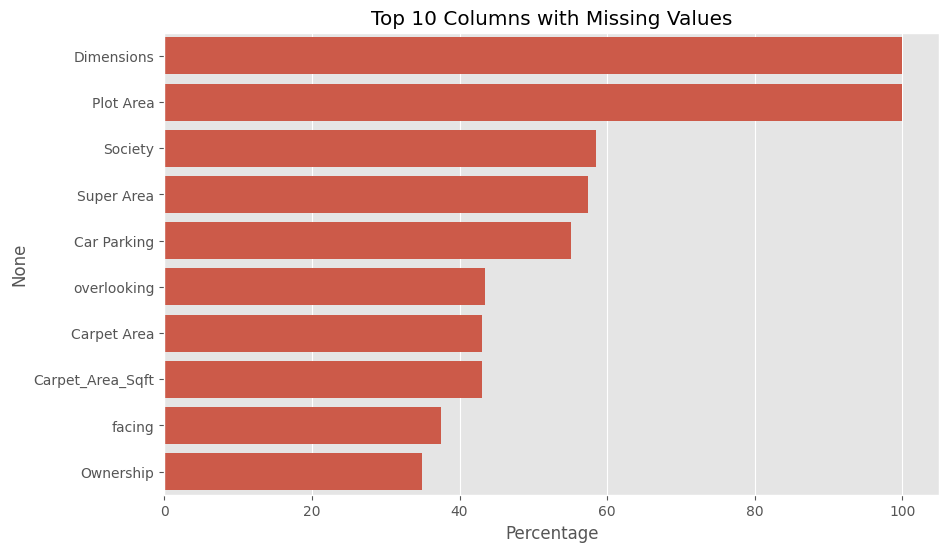

In [24]:
plt.figure(figsize=(10, 6))
sns.barplot(x=missing_percentage.head(10).values, y=missing_percentage.head(10).index)
plt.title('Top 10 Columns with Missing Values')
plt.xlabel('Percentage')
plt.show()


## 4. Distributions
Plotting histograms and boxplots for key variables (`Target_Price` and `Carpet_Area_Sqft`).


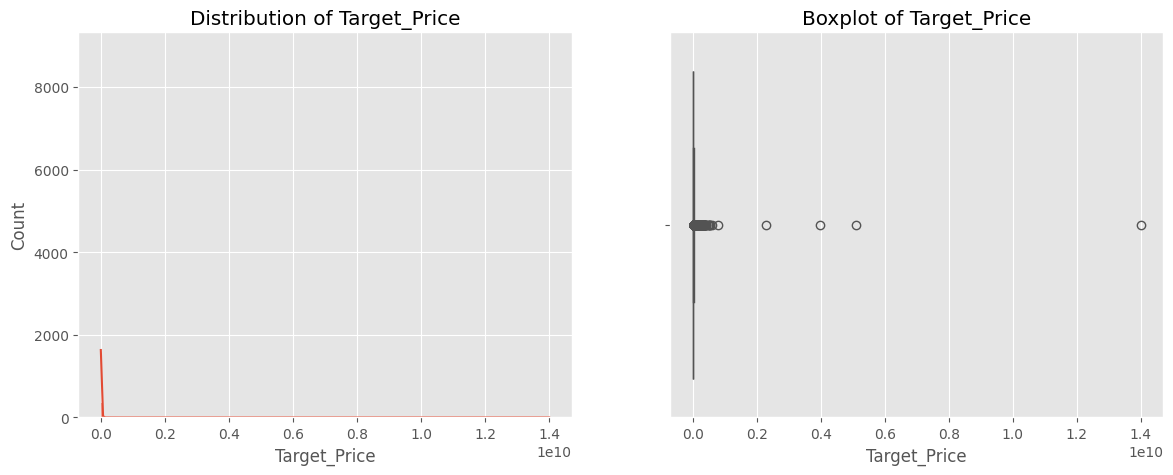

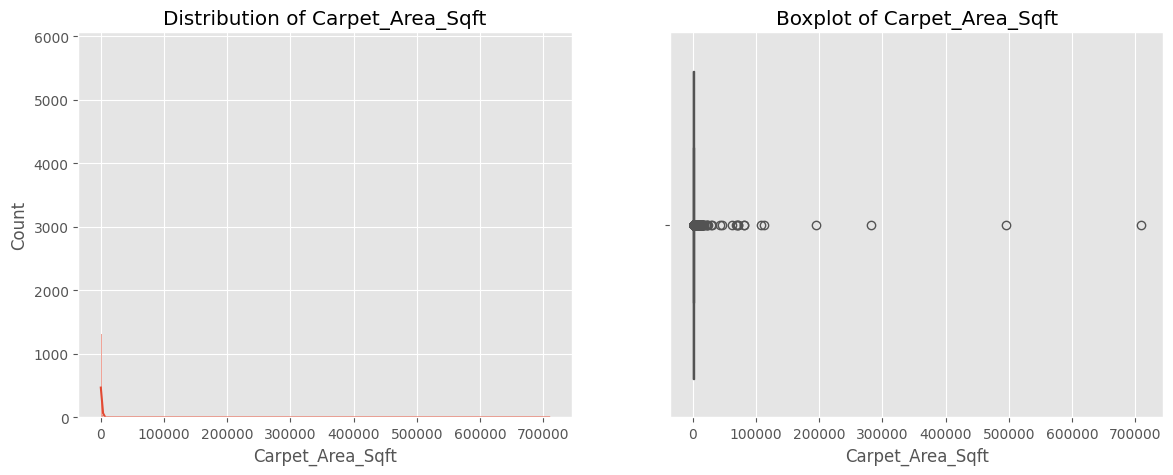

In [25]:
def plot_dist(df, col):
    plt.figure(figsize=(14, 5))
    plt.subplot(1, 2, 1)
    sns.histplot(df[col].dropna(), kde=True)
    plt.title(f'Distribution of {col}')
    
    plt.subplot(1, 2, 2)
    sns.boxplot(x=df[col].dropna())
    plt.title(f'Boxplot of {col}')
    plt.show()

plot_dist(df, 'Target_Price')
plot_dist(df, 'Carpet_Area_Sqft')


### 4.1 Categorical Distributions
Visualizing the frequency of categorical variables like `Status`, `Transaction`, and `Furnishing`.


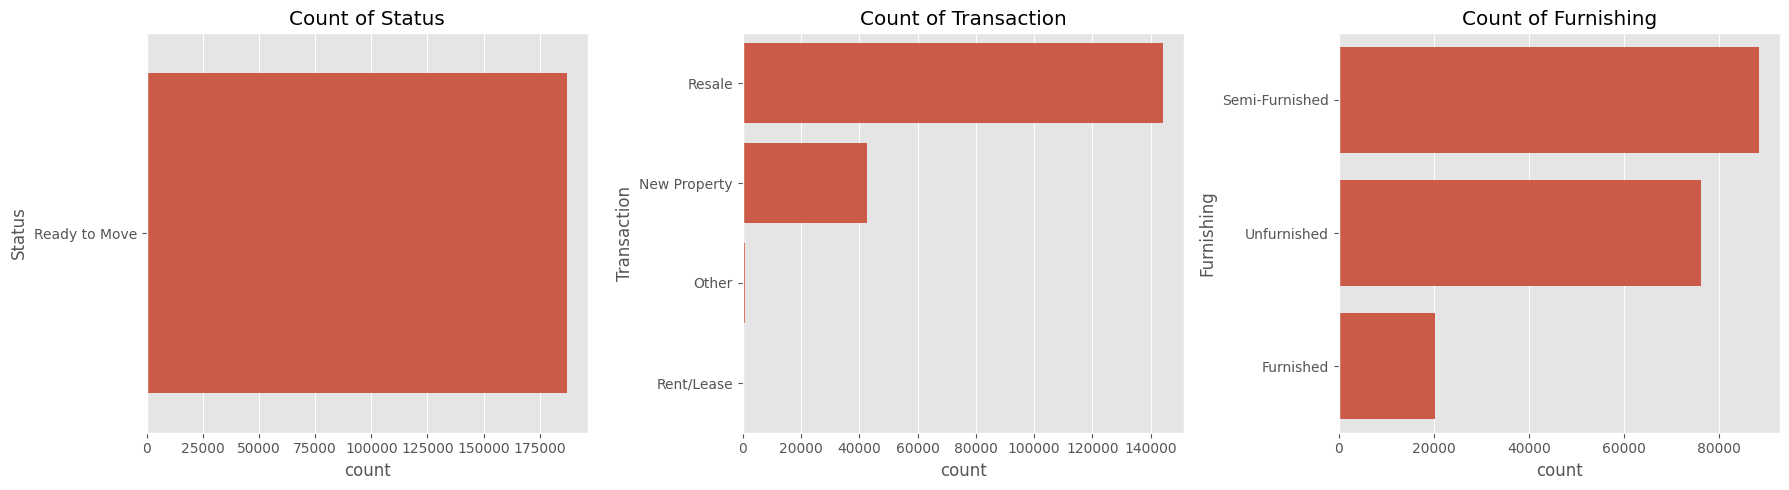

In [26]:
categorical_cols = ['Status', 'Transaction', 'Furnishing']
plt.figure(figsize=(18, 5))
for i, col in enumerate(categorical_cols, 1):
    if col in df.columns:
        plt.subplot(1, 3, i)
        sns.countplot(y=df[col], order=df[col].value_counts().index)
        plt.title(f'Count of {col}')
plt.tight_layout()
plt.show()


### 4.2 Price by Category
Analyzing the Average Target Price across different categorical groups.


C:\Users\ambar\AppData\Local\Temp\ipykernel_28892\3701780900.py:5: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Target_Price', y=col, data=df, ci=None)
C:\Users\ambar\AppData\Local\Temp\ipykernel_28892\3701780900.py:5: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Target_Price', y=col, data=df, ci=None)
C:\Users\ambar\AppData\Local\Temp\ipykernel_28892\3701780900.py:5: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Target_Price', y=col, data=df, ci=None)


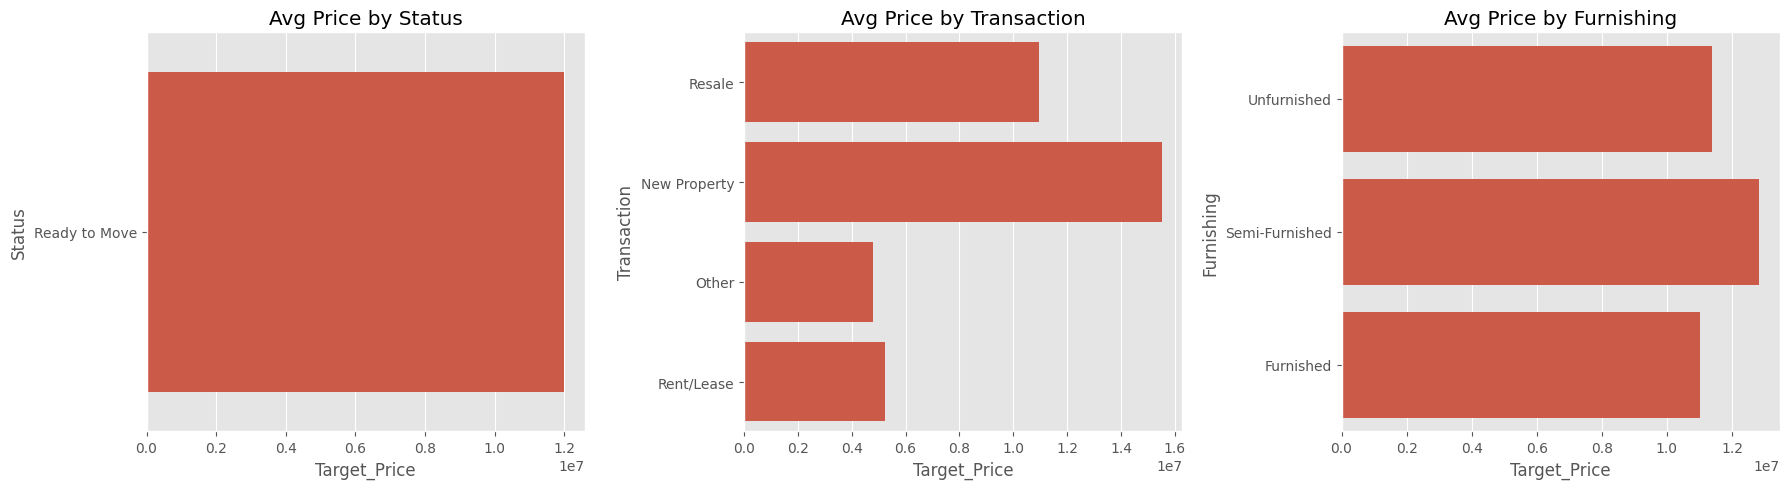

In [27]:
plt.figure(figsize=(18, 5))
for i, col in enumerate(categorical_cols, 1):
    if col in df.columns:
        plt.subplot(1, 3, i)
        sns.barplot(x='Target_Price', y=col, data=df, ci=None)
        plt.title(f'Avg Price by {col}')
plt.tight_layout()
plt.show()


### 4.3 Scatter Plots
Examining the relationship between Carpet Area and Price, colored by Status.


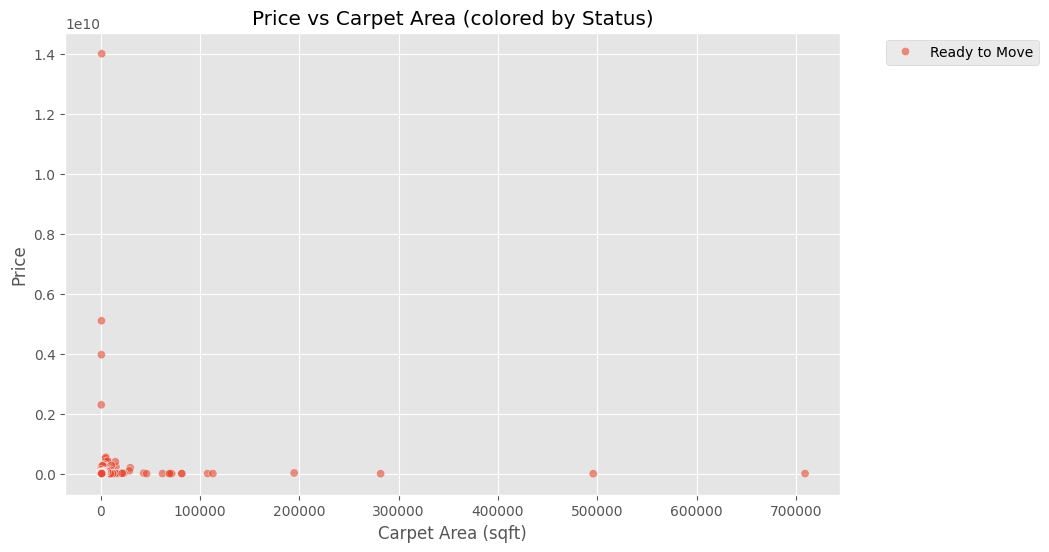

In [28]:
if 'Carpet_Area_Sqft' in df.columns and 'Target_Price' in df.columns:
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x='Carpet_Area_Sqft', y='Target_Price', hue='Status', data=df, alpha=0.6)
    plt.title('Price vs Carpet Area (colored by Status)')
    plt.xlabel('Carpet Area (sqft)')
    plt.ylabel('Price')
    plt.legend(bbox_to_anchor=(1.05, 1), loc=2)
    plt.show()


### 4.4 Summary Tables
Grouping data to see Key Statistics (Mean Price) by different categories.


In [29]:
print('Average Price by Transaction Type:')
print(df.groupby('Transaction')['Target_Price'].mean().sort_values(ascending=False))

print('\nAverage Price by Furnishing Status:')
print(df.groupby('Furnishing')['Target_Price'].mean().sort_values(ascending=False))


Average Price by Transaction Type:
Transaction
New Property    1.550854e+07
Resale          1.094314e+07
Rent/Lease      5.250000e+06
Other           4.785818e+06
Name: Target_Price, dtype: float64

Average Price by Furnishing Status:
Furnishing
Semi-Furnished    1.283528e+07
Unfurnished       1.137175e+07
Furnished         1.102939e+07
Name: Target_Price, dtype: float64


## 5. Outlier Detection (IQR Method)
Detecting outliers using the Interquartile Range (IQR) method.


In [30]:
outlier_indices = set()
target_cols = ['Target_Price', 'Carpet_Area_Sqft']

for col in target_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    print(f'Outliers in {col}: {len(outliers)}')
    outlier_indices.update(outliers.index)

# 6. Create Outlier Flag Column
df['Outlier_Flag'] = 0
df.loc[list(outlier_indices), 'Outlier_Flag'] = 1
print(f'Total rows flagged as outliers: {df["Outlier_Flag"].sum()}')


Outliers in Target_Price: 12283
Outliers in Carpet_Area_Sqft: 4300
Total rows flagged as outliers: 12828


## 7. Handle Outliers
Strategy: Cap outliers to the 1st and 99th percentiles to reduce the impact of extreme values while preserving data.


In [31]:
df_cleaned = df.copy()

for col in target_cols:
    lower_cap = df[col].quantile(0.01)
    upper_cap = df[col].quantile(0.99)
    df_cleaned[col] = df_cleaned[col].clip(lower=lower_cap, upper=upper_cap)
    print(f'Capped {col} at {lower_cap:.2f} and {upper_cap:.2f}')


Capped Target_Price at 1600000.00 and 70000000.00
Capped Carpet_Area_Sqft at 50.00 and 4552.15


## 8. Correlation Analysis
Analyzing correlations between numerical features and `Target_Price`.


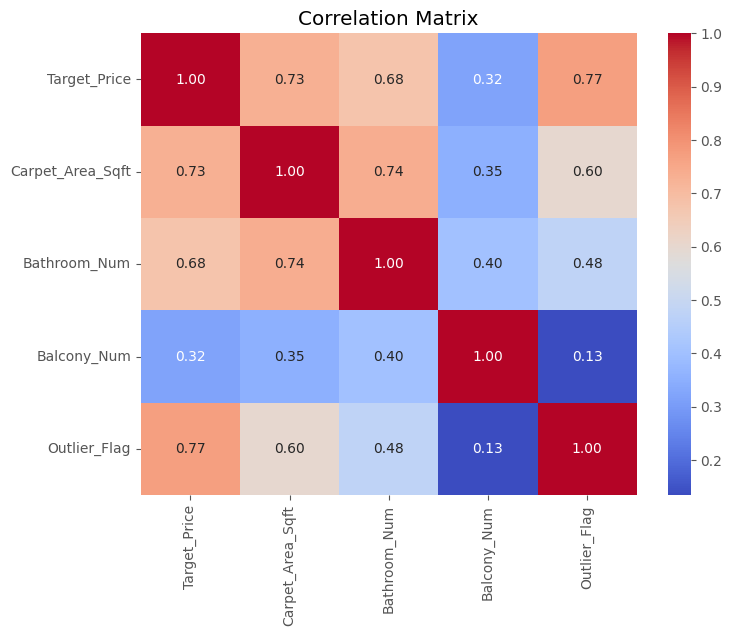

Top Correlations with Price:
Target_Price        1.000000
Outlier_Flag        0.771287
Carpet_Area_Sqft    0.730337
Bathroom_Num        0.678023
Balcony_Num         0.319170
Name: Target_Price, dtype: float64


In [32]:
numeric_cols = ['Target_Price', 'Carpet_Area_Sqft', 'Bathroom_Num', 'Balcony_Num', 'Outlier_Flag']
corr_matrix = df_cleaned[numeric_cols].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

print('Top Correlations with Price:')
print(corr_matrix['Target_Price'].sort_values(ascending=False))


## 9. Export Cleaned Dataset
Saving the cleaned dataset to a CSV file.


In [33]:
df_cleaned.to_csv('cleaned_dataset.csv', index=False)
print('Exported to cleaned_dataset.csv')


Exported to cleaned_dataset.csv
